In [35]:
# Import required packages
import numpy as np               # for mathematical operations, for arrays
import pandas as pd              # Used for different data manipulation tasks
import matplotlib.pyplot as plt  # Used for Plotting 
import random                    # For random number generator
import warnings
warnings.filterwarnings('ignore')# To avoid warnings note while running the notebook
from sympy import *

# Section 1 : Implementing Gradient Descent

Gradient Descent is an first order optimization algorithm to find the local minimum differentiable function (usually a loss function or an objective function). We start with a random point on the function and move in the negative direction of the gradient of the function to reach the find minimum.

Let $F(x)$ be a differentiable function parameterised by $x$ and $x^*$ be the parameter value which minimises $F(x)$. The initial value is $x_0=a_0$. To determine $x^*$ using gradient descent, at each of the $i^{th}$ the parameter updation rule is:

\begin{align*}
x_i = x_{i-1} - \eta \nabla F(a_{i-1}), \hspace{1cm} i\geq 1
\end{align*}  
where $x_i$ is updated value of the parameter in the $i^{th}$ iteration. 

\begin{align*}
\eta \nabla F(a_{i-1}) = \eta \frac{dF}{dx}\bigr \rvert_{x=a_{i-1}}
\end{align*} 

**Stopping Criteria**: Following are three ways which are used as stopping criteria in gradient descent algorithm:
1. Limiting number of iterations
2. Threshold for change in the parameter (i.e difference between the updated parameter and parameter in the previous iteration) --> Change in parameter > Threshold
3. Threshold for change in gradient step
                  
**Question** : Find $x^*$ which minimises $F(x) = (x+5)^2$ using gradient descent 

**Note : Few variables are set to a given value, read the instructions in the pseudo code**

**Pseudo Code**:
1. Initialise the parameter ('x') with some random number,set learning rate = 0.01(section 4 has details on "how to select appropriate learning rate for a given problem"), set threshold = 0.000001,
2. Define a function for calculating differential of F (Hint : Use lambda method for single line of code)
3. Compute the updated value of the parameter using the formula: $x_i = x_i-1 - \eta \nabla F(a_{i-1})$ 
4. Iterate over step 3 until the stopping criteria is satisfied (You have to choose stopping criteria appropriately)

## 1.1 Implementing Code
Implement the above pseudo code and print the optimum value of $x$ and $F(x)$. Also print the number of iterations required to reach that optimum.

**Note : Carefully choose your stopping criteria for reaching optimum**

Initial guess: 0.285610378759654
NUmber of iterations to converge: 574
Optimal value of x is: -4.999951374666379
Function value is: 2.3644230697470393e-09


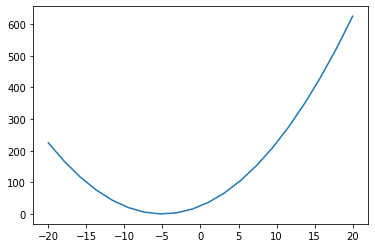

In [81]:
# Write your code here
random.seed(10)
f = lambda x: (x + 5)**2
x = np.linspace(-20,20,20)
plt.plot(x, f(x))
x = Symbol('x')
f = (x + 5)**2
y_prime = f.diff(x)
g = lambdify(x, y_prime,'numpy')
x0 = random.uniform(-2,2)
x_old = x0
x_new = x0
diff = 10
alpha = 0.01
i = 0
while diff >= 10**(-6):
    x_new = x_old - alpha*g(x_old)
    diff = abs(x_new - x_old)
    x_old = x_new
    i += 1

print("Initial guess:", x0)
print("NUmber of iterations to converge:",i)
print("Optimal value of x is:", x_new)
print("Function value is:",(x_new+5)**2)

# Section 2 : Linear Regression - Finding the Regression parameters using Normal Equation (Analytical Approach)
**Dataset** : dataset1.csv (given)

Given a dataset (here dataset1.csv), find the coefficients (parameters) using the Normal Equation and predict the outputs for the same dataset (dataset1.csv). Given input features in matrix $X$ and observed output or target vector $y$, the regression parameters are given by the equation:
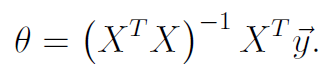


**Pseudo Code:**
1. Append ones to X, let say that as "X_appended" (This is to be done when there is intercept, if you know before hand that intercept is zero, then this step can be ignored)
2. Find the pseudo Inverse of the X_appended
3. Find the dot product of transpose of X_appended and target vector (y),
4. Find "theta" (parameters) using "Normal Equation" given above (i.e Matrix multiplication of outputs of Step 2 and Step 3)
5. Predict ouputs for X_new by appending it with ones and then using the formula $y=X_{new}\theta$

**Note : When you perform matrix multiplications or dot products on vectors or matrices, always keep track of the matrix or vectors shapes. This helps you in avoiding implementation errors.**

<div class="alert alert-block alert-warning">
**Implementation Note:** Step 1 is crucial. We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [151]:
# Import X, y from "dataset1.csv"
# X and y are numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array

data = np.array(pd.read_csv('dataset1.csv'))
X = data[:,0]
y = data[:,1]
X = X[:,np.newaxis]

### 2.1 Function to predict the outputs
Implement the predict function below. Predict the outputs for the given data (dataset1.csv), plot the predicted outputs Vs input features and scatter plot for dataset1.csv (X,y)

Optimal theta: [17.78924731  4.90189099]


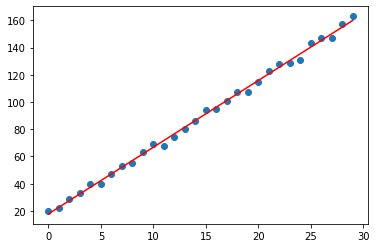

In [231]:
def predict(X, theta):
    """
    Predictions of X for a given theta.
    
    Parameters
    ----------
    X : array with size of (m x n)
    
    theta : array with size of (n+1, 1).
    
    Returns
    -------
    predictions : array of size (m x 1)
    
    """
    bias = np.ones((len(X),1)) 
    X= np.concatenate((bias, X), axis=1)
    
    XTy = np.dot(X.T,y)
    pinv = np.linalg.pinv(np.dot(X.T,X))
    theta = np.dot(pinv,XTy)
    prediction = np.dot(X,theta)
    
    return theta, prediction

theta, prediction = predict(X, None)

# Your predictions for the dataset1.csv
print("Optimal theta:", theta)
# plot a line Predictions Vs features and scatter plot for the training data X,y
plt.scatter(X,y)
plt.plot(X,prediction,'r',label='pred')

# Section 3 : Linear Regression - Find the Regression parameters using Gradient Descent
This section is about applying gradient descent algorithm to find theta at which a cost function (Mean Squared Error) is minimum. This can be done using the gradient descent algorithm discussed in Section 1, where $x$ is replaced by the regression parameters. 

Refer to pseudo code in Section 1 for gradient descent algorithm. In simple terms, we initialise the regression parameters with some random number and we compute the gradient step to update the regression parameters.

### 3.1. Import and visualise the dataset

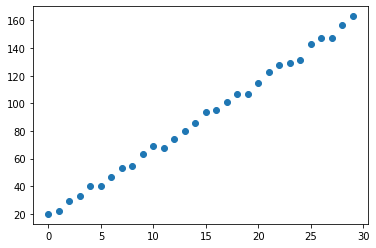

In [365]:
# Import the data from dataset1.csv - Same as Section 2
# Import X and y as numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array
data = np.array(pd.read_csv('dataset1.csv'))
X = data[:,0]
y = data[:,1]
X = X[:,np.newaxis]
y = y[:,np.newaxis]
# Satter Plot the data X and y for visualisation
plt.scatter(X,y)
X = np.concatenate((np.ones((len(X),1)) , X), axis=1)

### 3.2. Compute Cost Function - Mean Squared Error (MSE) 
The cost function used is Mean Squared Error (MSE) represented as $J(\theta)$ and is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is a linear model given by: 
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. This way you can know whether you choose high learning rate or low learning rate. Suppose if your learning rate is too high, you can see your cost will go up and down, but will not converge. If you choose good learning rate, then you can see your cost going down smoothly and converges.

In this you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

In [336]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array with the shape of (m x n+1)
        where m is the number of examples,n is the number of features
        n+1 == n features + 1 for bias term(intercept as a feature)
    
    y : array with the shape of (m,1)
    
    theta : array with the shape of (n+1,1)
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # Write your code here
    J = 0
    for i in range(len(y)):
        pred = np.dot(X,theta)
        J += (pred[i] - y[i])**2
    J /= 2*y.shape[0]
    return J[0]
print(computeCost(X,y,theta))

4851.133333333333


## 3.3. Implementation of Gradient Descent 

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Important implementation notes**

The function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a python list. If you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [369]:
def gradientDescent(X_appended, y, theta, alpha, precision = 0.001):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X_appended : array with shape of (m x n+1). Note : n+1 = n features + 1 intercept
    
    y : array with shape of (m, 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    precision : float, (One of the Stopping criteria). This is compared with the change in the cost from previous iter.
    
    Returns
    -------
    theta : array wih shape of (n+1,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    Count : Integer, Number of iterations taken to converge
    
    Cost : Float, Mean squared error at the end of the iteration
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Write your code here
    theta_new = theta
    count = 0
    diff = 10
    J_history = []
    cost2 = 0
    while diff >= precision:
        pred = np.dot(X,theta)
        delta = (1/len(y))*np.dot(X.T,(pred-y)) 
        theta_new = theta - alpha*delta
        cost1 = computeCost(X,y,theta)
        cost2 = computeCost(X,y,theta_new)
        theta_new = theta - alpha*delta
        J_history.append(cost2)
        diff = abs(cost2-cost1)
        #print(cost2)
        count += 1
        theta = theta_new
        
    return theta, J_history, cost2, count

### Run gradientDescent function to train the model here
**Note : Use the learning rate(alpha) and precision given below. Initialise theta with zeros is suggested here (but you can initialise with different numbers)**

Print the final theta (learnt parameters), number of iterations to converge, value of cost function at the convergence.

In [341]:
# initialize fitting parameters with zeros
theta = np.zeros((2,1))

# Play with these setting to see how these parameters play a huge, for a decent converge use below parameters
precision = 0.00001
alpha = 0.001

##################################### Your Code here ########################################

theta, J_history, cost, count = gradientDescent(X_appended, y, theta, alpha, precision)

2494.6169327211105
1292.9430432659278
680.1605338538658
367.6727028882081
208.31480133954548
127.0427859549088
85.58928316080686
64.44052721595912
53.64582075339796
48.13098283702176
45.30852525002287
43.85900444802711
43.10959368768769
42.71719694923699
42.50685852398441
42.38936286085179
42.31921607538823
42.273219368502865
42.23954292288358
42.21215433103401
42.187977471362224
42.165443727632855
42.14375320912508
42.12249802300698
42.10147016879169
42.08056357753547
42.05972415847157
42.0389243261804
42.018150011173745
41.99739403617328
41.97665273846198
41.955924247512066
41.93520760669237
41.91450232539832
41.893808150669045
41.873124950727025
41.852452655591584
41.83179122679578
41.811140641943915
41.790500886837
41.769871951457326
41.74925382792069
41.72864650943249
41.70804998975489
41.687464262935805
41.666889323169954
41.646325164728616
41.62577178192343
41.605229169088126
41.58469732056917
41.56417623072085
41.543665893903
41.52316630447977
41.502677456818766
41.482199345291

32.38289042901447
32.367191075522726
32.351499948474334
32.33581704355864
32.32014235646732
32.30447588289422
32.28881761853544
32.2731675590894
32.25752570025673
32.2418920377403
32.226266567245254
32.210649284479
32.19504018515118
32.1794392649736
32.16384651966049
32.1482619449282
32.132685536495394
32.11711729008282
32.10155720141372
32.08600526621339
32.07046148020942
32.054925839131634
32.03939833871214
32.023878974685196
32.008367742787364
31.99286463875741
31.977369658336375
31.96188279726743
31.946404051296103
31.93093341617005
31.91547088763923
31.90001646145577
31.884570133374066
31.86913189915072
31.85370175454459
31.838279695316633
31.82286571723023
31.807459816050816
31.792061987546067
31.77667222748595
31.76129053164267
31.745916895790483
31.730551315706034
31.71519378716806
31.699844305957576
31.68450286785781
31.669169468654182
31.65384410413429
31.63852677008797
31.623217462307327
31.60791617658651
31.592622908722042
31.57733765451256
31.56206040975889
31.546791170264

25.367225416270156
25.355202263269938
25.343185410388223
25.33117485432375
25.319170591777006
25.307172619450167
25.295180934047202
25.28319553227379
25.271216410837265
25.259243566446703
25.247276995813046
25.23531669564877
25.223362662668226
25.211414893587346
25.199473385123902
25.187538133997297
25.175609136928706
25.163686390641036
25.15176989185886
25.139859637308504
25.127955623717998
25.11605784781708
25.1041663063372
25.092280996011542
25.080401913574985
25.06852905576411
25.05666241931724
25.044802000974382
25.032947797477263
25.02109980556929
25.0092580219956
24.997422443503044
24.985593066840185
24.97376988875723
24.961952906006143
24.950142115340626
24.938337513515926
24.926539097289222
24.91474686341916
24.902960808666283
24.891180929792686
24.87940722356223
24.86763968674044
24.855878316094568
24.844123108393557
24.832374060408004
24.820631168910268
24.808894430674332
24.797163842475843
24.785439401092283
24.773721103302645
24.762008945887736
24.75030292563001
24.7386030

19.530868899031667
19.521903990211975
19.512943778994266
19.503988262917062
19.495037439520093
19.48609130634443
19.47714986093238
19.468213100827555
19.45928102357486
19.45035362672052
19.441430907811945
19.432512864397967
19.423599494028586
19.41469079425513
19.405786762630232
19.396887396707807
19.387992694043007
19.379102652192284
19.370217268713382
19.36133654116531
19.352460467108404
19.343589044104203
19.33472226971555
19.32586014150663
19.317002657042803
19.30814981389078
19.299301609618492
19.290458041795183
19.281619107991357
19.272784805778823
19.26395513273057
19.255130086420976
19.246309664425606
19.23749386432133
19.228682683686305
19.219876120099915
19.21107417114285
19.20227683439699
19.193484107445617
19.184695987873155
19.175912473265367
19.167133561209244
19.15835924929306
19.14958953510637
19.14082441623991
19.132063890285792
19.12330795483728
19.114556607489032
19.105809845836816
19.09706766747779
19.08833007001028
19.0795970510339
19.070868608149553
19.06214473895

15.232667873584072
15.225955217215667
15.219246078271565
15.212540454908662
15.205838345284763
15.199139747558688
15.192444659890212
15.185753080440058
15.17906500736992
15.172380438842476
15.165699373021349
15.159021808071117
15.152347742157334
15.145677173446478
15.139010100106074
15.132346520304505
15.125686432211161
15.119029833996422
15.112376723831582
15.105727099888908
15.09908096034164
15.0924383033639
15.085799127130889
15.079163429818674
15.072531209604291
15.06590246466577
15.059277193182083
15.052655393333106
15.046037063299718
15.039422201263756
15.032810805407959
15.026202873916096
15.019598404972829
15.01299739676377
15.006399847475498
14.999805755295565
14.993215118412438
14.986627935015525
14.98004420329526
14.973463921442919
14.966887087650768
14.960313700112065
14.953743757020963
14.94717725657257
14.940614196962962
14.93405457638911
14.927498393048978
14.92094564514148
14.914396330866422
14.907850448424592
14.901307996017753
14.894768971848517
14.888233374120514
14.

12.090013672008402
12.084947762869165
12.0798845082606
12.07482390679167
12.069765957072146
12.064710657712544
12.059658007324051
12.054608004518627
12.04956064790893
12.044515936108361
12.039473867731036
12.034434441391792
12.02939765570625
12.024363509290657
12.019332000762091
12.014303128738245
12.009276891837635
12.004253288679447
11.999232317883608
11.994213978070755
11.989198267862266
11.984185185880218
11.979174730747424
11.974166901087436
11.96916169552448
11.964159112683557
11.959159151190372
11.954161809671316
11.949167086753539
11.944174981064878
11.939185491233944
11.93419861588999
11.929214353663061
11.92423270318385
11.919253663083852
11.914277231995205
11.909303408550793
11.904332191384194
11.89936357912975
11.894397570422482
11.889434163898112
11.884473358193143
11.879515151944721
11.874559543790717
11.86960653236977
11.864656116321182
11.859708294284967
11.854763064901872
11.84982042681335
11.844880378661575
11.83994291908942
11.835008046740464
11.830075760258998
11.82

9.66876975477681
9.664972574697853
9.661177384336941
9.657384182651466
9.653592968599353
9.649803741139102
9.646016499229727
9.642231241830823
9.638447967902461
9.634666676405368
9.630887366300701
9.627110036550254
9.62333468611629
9.619561313961663
9.615789919049753
9.612020500344487
9.60825305681035
9.604487587412333
9.600724091115998
9.596962566887445
9.593203013693314
9.589445430500787
9.585689816277576
9.581936169991963
9.578184490612719
9.574434777109213
9.570687028451305
9.566941243609454
9.563197421554598
9.559455561258233
9.555715661692421
9.55197772182971
9.548241740643252
9.54450771710669
9.540775650194213
9.53704553888058
9.533317382141004
9.52959117895132
9.525866928287888
9.522144629127572
9.518424280447773
9.514705881226453
9.510989430442107
9.507274927073741
9.503562370100925
9.499851758503736
9.4961430912628
9.49243636735929
9.4887315857749
9.485028745491835
9.481327845492878
9.477628884761307
9.473931862280965
9.470236777036181
9.466543628011879
9.462852414193469
9.45

7.902527346632809
7.899655675567926
7.896785509255422
7.893916846906789
7.8910496877339815
7.888184030949318
7.885319875765549
7.882457221395849
7.879596067053773
7.876736411953325
7.873878255308903
7.871021596335306
7.868166434247763
7.865312768261915
7.862460597593796
7.859609921459859
7.856760739076979
7.853913049662438
7.851066852433911
7.848222146609495
7.845378931407691
7.842537206047426
7.8396969697480134
7.836858221729203
7.834020961211119
7.831185187414326
7.828350899559767
7.825518096868834
7.822686778563291
7.819856943865323
7.817028591997512
7.814201722182868
7.811376333644791
7.808552425607098
7.80572999729401
7.802909047930142
7.8000895767405485
7.7972715829506445
7.794455065786273
7.791640024473706
7.78882645823959
7.7860143663109715
7.783203747915337
7.780394602280539
7.777586928634862
7.774780726206988
7.771975994225987
7.769172731921364
7.766370938522998
7.763570613261193
7.760771755366633
7.757974364070433
7.755178438604099
7.752383978199526
7.749590982089024
7.74679

6.545115299680857
6.542954910985526
6.540795654331419
6.538637529125338
6.536480534774418
6.534324670686088
6.5321699362680805
6.530016330928471
6.527863854075605
6.5257125051181655
6.523562283465129
6.521413188525796
6.519265219709771
6.517118376426964
6.514972658087599
6.512828064102191
6.51068459388161
6.508542246836981
6.506401022379763
6.504260919921733
6.502121938874952
6.499984078651822
6.497847338665007
6.495711718327515
6.493577217052662
6.4914438342540395
6.489311569345589
6.487180421741525
6.485050390856374
6.482921476104996
6.480793676902522
6.478666992664419
6.476541422806424
6.474416966744635
6.4722936238954025
6.470171393675403
6.468050275501623
6.465930268791364
6.463811372962207
6.461693587432052
6.459576911619117
6.457461344941904
6.455346886819209
6.453233536670178
6.451121293914219
6.449010157971064
6.446900128260741
6.444791204203595
6.442683385220248
6.440576670731661
6.438471060159068
6.436366552924018
6.434263148448372
6.432160846154278
6.430059645464194
6.42795

5.499629743691953
5.4980171882394995
5.496405477764273
5.494794611823492
5.493184589974644
5.491575411775412
5.489967076783727
5.488359584557746
5.486752934655872
5.4851471266367104
5.483542160059131
5.4819380344822175
5.480334749465272
5.478732304567859
5.477130699349759
5.475529933370958
5.473930006191722
5.472330917372498
5.470732666474007
5.469135253057164
5.467538676683134
5.465942936913324
5.464348033309324
5.4627539654330075
5.461160732846434
5.45956833511193
5.457976771792033
5.456386042449507
5.454796146647345
5.453207083948774
5.451618853917259
5.450031456116471
5.44844489011032
5.4468591554629615
5.445274251738743
5.443690178502299
5.442106935318409
5.440524521752149
5.438942937368807
5.43736218173388
5.435782254413102
5.4342031549724545
5.4326248829781205
5.431047437996508
5.429470819594272
5.427895027338287
5.426320060795664
5.424745919533719
5.423172603119991
5.421600111122283
5.420028443108597
5.418457598647169
5.416887577306432
5.4153183786551065
5.4137500022620975
5.41

4.712046924146663
4.710847061196365
4.709647826972875
4.708449221146763
4.707251243388745
4.7060538933697025
4.704857170760714
4.703661075233005
4.702465606458002
4.701270764107281
4.700076547852583
4.69888295736585
4.697689992319181
4.6964976523848305
4.695305937235251
4.694114846543057
4.692924379981041
4.6917345372221435
4.690545317939493
4.689356721806402
4.688168748496329
4.686981397682925
4.685794669039998
4.684608562241527
4.683423076961666
4.682238212874754
4.681053969655275
4.679870346977885
4.678687344517437
4.677504961948945
4.676323198947565
4.675142055188655
4.673961530347733
4.6727816241004865
4.671602336122772
4.670423666090619
4.66924561368021
4.668068178567947
4.666891360430329
4.6657151589440815
4.664539573786074
4.663364604633359
4.662190251163138
4.661016513052808
4.659843389979902
4.65867088162216
4.657498987657465
4.656327707763871
4.6551570416196135
4.653986988903082
4.652817549292848
4.651648722467643
4.6504805081063525
4.6493129058880776
4.648145915492025
4.646

4.138574169287215
4.137674805408554
4.136775912795552
4.135877491201251
4.134979540378846
4.13408206008165
4.133185050063107
4.132288510076801
4.131392439876422
4.130496839215808
4.129601707848931
4.12870704552986
4.12781285201284
4.126919127052204
4.126025870402425
4.1251330818181176
4.124240761054016
4.123348907864983
4.122457522006001
4.121566603232196
4.120676151298823
4.119786165961239
4.118896646974966
4.1180075940956336
4.117119007078999
4.1162308856809515
4.115343229657504
4.114456038764808
4.113569312759121
4.112683051396863
4.111797254434545
4.110911921628832
4.110027052736502
4.109142647514471
4.108258705719765
4.107375227109552
4.106492211441132
4.105609658471922
4.104727567959459
4.103845939661409
4.102964773335604
4.102084068739945
4.1012038256325
4.1003240437714314
4.0994447229150595
4.09856586282182
4.097687463250271
4.0968095239591005
4.095932044707132
4.095055025253269
4.094178465356614
4.093302364776351
4.092426723271794
4.091551540602393
4.090676816527714
4.08980255

3.712100430196324
3.7114245380721473
3.710749000114684
3.710073816138345
3.709398985957626
3.708724509387176
3.708050386241668
3.707376616335919
3.7067031994848434
3.706030135503431
3.705357424206773
3.7046850654100725
3.7040130589286275
3.703341404577801
3.7026701021731028
3.701999151530095
3.701328552464464
3.700658304791979
3.6999884083285113
3.6993188628900264
3.698649668292595
3.697980824352376
3.6973123308856093
3.6966441877086726
3.6959763946379907
3.6953089514901234
3.6946418580817078
3.693975114229475
3.693308719750267
3.6926426744610046
3.6919769781787175
3.691311630720533
3.6906466319036557
3.689981981545402
3.6893176794631786
3.6886537254744933
3.6879901193969378
3.687326861048224
3.6866639502461216
3.686001386808528
3.6853391705534277
3.684677301298889
3.684015778863082
3.68335460306429
3.6826937737208545
3.6820332906512436
3.6813731536740204
3.6807133626078152
3.6800539172713775
3.679394817483556
3.6787360630632597
3.678077653829539
3.677419589601513
3.6767618701983844
3.

3.387033888466602
3.3865283308407723
3.3860230381265666
3.3855180101851725
3.3850132468778438
3.384508748065907
3.384004513610784
3.3835005433739362
3.3829968372169192
3.382493395001362
3.381990216588942
3.3814873018414473
3.380984650620704
3.3804822627886306
3.379980138207217
3.3794782767385105
3.378976678244633
3.3784753425878096
3.37797426963029
3.377473459234426
3.376972911262659
3.3764726255774433
3.3759726020413696
3.3754728405170487
3.3749733408672045
3.374474102954616
3.373975126642118
3.37347641179264
3.3729779582691766
3.3724797659347945
3.3719818346526282
3.3714841642858913
3.3709867546978582
3.3704896057518843
3.3699927173113946
3.36949608923988
3.3689997214009124
3.3685036136581266
3.3680077658752325
3.3675121779160144
3.36701684964433
3.366521780924091
3.3660269716193016
3.3655324215940166
3.365038130712384
3.364544098838614
3.3640503258369905
3.3635568115718635
3.363063555907629
3.362570558708818
3.3620778198399752
3.3615853391657384
3.361093116550818
3.3606011518599836


3.1401161779558584
3.139740004929657
3.139364029017687
3.13898825011667
3.1386126681233697
3.1382372829346044
3.1378620944472573
3.137487102558249
3.1371123071645624
3.1367377081632384
3.136363305451363
3.1359890989260815
3.1356150884845966
3.135241274024158
3.1348676554420742
3.1344942326357015
3.1341210055024518
3.133747973939793
3.1333751378452552
3.133002497116402
3.1326300516508723
3.132257801346335
3.131885746100545
3.13151388581128
3.1311422203763755
3.1307707496937365
3.1303994736613223
3.1300283921771177
3.1296575051391984
3.129286812445657
3.128916313994671
3.1285460096844435
3.1281758994132676
3.127805983079443
3.1274362605813626
3.127066731817441
3.126697396686181
3.126328255086105
3.125959306915809
3.1255905520739433
3.1252219904591834
3.1248536219702956
3.124485446506078
3.1241174639653804
3.1237496742471227
3.123382077250253
3.1230146728737975
3.1226474610168107
3.122280441578417
3.121913614457809
3.12154697955418
3.1211805367668304
3.1208142859950834
3.1204482271383234


2.951097651968824
2.9508205244353696
2.9505435421164226
2.950266704935904
2.9499900128177483
2.9497134656859436
2.9494370634645275
2.9491608060775563
2.948884693449152
2.948608725503448
2.9483329021646227
2.948057223356922
2.947781689004604
2.9475062990319665
2.9472310533633665
2.9469559519231816
2.9466809946358477
2.9464061814258082
2.9461315122175833
2.945856986935711
2.9455826055047742
2.945308367849395
2.9450342738942386
2.9447603235640027
2.9444865167834293
2.944212853477291
2.9439393335704196
2.9436659569876626
2.943392723653932
2.94311963349415
2.942846686433301
2.94257388239641
2.9423012213085182
2.9420287030947327
2.9417563276801735
2.9414840949900256
2.9412120049495014
2.9409400574838456
2.9406682525183476
2.940396589978354
2.9401250697892105
2.9398536918763414
2.939582456165193
2.9393113625812486
2.9390404110500308
2.938769601497107
2.938498933848088
2.9382284080286007
2.9379580239643426
2.937687781581021
2.9374176808044092
2.937147721560288
2.936877903774513
2.9366082273729

2.8203106548177894
2.820102059522156
2.819893573530237
2.8196851967847363
2.819476929228409
2.8192687708040522
2.819060721454468
2.818852781122502
2.818644949751041
2.8184372272829776
2.818229613661257
2.818022108828836
2.81781471272871
2.8176074253039
2.817400246497472
2.8171931762524975
2.8169862145121
2.8167793612194187
2.816572616317628
2.8163659797499294
2.8161594514595576
2.8159530313897765
2.8157467194838772
2.8155405156851825
2.8153344199370434
2.8151284321828367
2.814922552365988
2.814716780429924
2.8145111163181227
2.8143055599740836
2.814100111341331
2.8138947703634316
2.8136895369839694
2.813484411146562
2.813279392794867
2.81307448187255
2.812869678323324
2.8126649820909218
2.8124603931191214
2.812255911351703
2.812051536732499
2.811847269205364
2.811643108714181
2.8114390552028743
2.8112351086153575
2.8110312688956265
2.8108275359876775
2.8106239098355434
2.8104203903832845
2.8102169775749744
2.810013671354753
2.8098104716667627
2.809607378455175
2.8094043916642026
2.8092

2.720144020650498
2.7199879125573143
2.719831886264592
2.719675941729474
2.7195200789091087
2.719364297760688
2.7192085982414156
2.719052980308511
2.7188974439192153
2.718741989030825
2.7185866156006164
2.7184313235859094
2.718276112944039
2.718120983632376
2.717965935608281
2.7178109688291863
2.7176560832525
2.717501278835684
2.7173465555362073
2.7171919133115656
2.71703735211927
2.7168828719168703
2.716728472661911
2.716574154311988
2.716419916824715
2.716265760157699
2.7161116842686
2.7159576891151014
2.7158037746548778
2.71564994084566
2.715496187645187
2.7153425150112125
2.7151889229015262
2.7150354112739308
2.7148819800862554
2.7147286292963364
2.714575358862077
2.7144221687413332
2.714269058892045
2.7141160292721467
2.7139630798395924
2.7138102105523654
2.713657421368477
2.713504712245933
2.7133520831428117
2.713199534017163
2.7130470648270775
2.7128946755306766
2.712742366086092
2.7125901364514893
2.7124379865850363
2.712285916444941
2.712133925989431
2.7119820151767384
2.71183

2.6461183634248426
2.6460010446918973
2.6458837874338355
2.6457665916184347
2.6456494572135183
2.645532384186886
2.6454153725063967
2.6452984221398954
2.645181533055246
2.6450647052203466
2.6449479386031007
2.644831233171433
2.6447145888932733
2.644598005736588
2.644481483669336
2.644365022659523
2.644248622675141
2.6441322836842205
2.644016005654803
2.643899788554934
2.6437836323527004
2.6436675370161797
2.643551502513483
2.6434355288127405
2.6433196158820746
2.6432037636896606
2.6430879722036584
2.6429722413922656
2.642856571223689
2.6427409616661492
2.6426254126878774
2.6425099242571495
2.6423944963422232
2.6422791289113943
2.6421638219329706
2.6420485753752674
2.6419333892066286
2.6418182633954186
2.6417031979099947
2.64158819271876
2.641473247790109
2.6413583630924835
2.64124353859429
2.641128774264019
2.6410140700701175
2.6408994259810883
2.640784841965427
2.640670317991662
2.6405558540283285
2.6404414500439795
2.640327106007193
2.6402128218865473
2.640098597650655
2.639984433268

2.5898702176379205
2.589782372869427
2.589694574131497
2.589606821399994
2.589519114650827
2.589431453859898
2.589343839003128
2.5892562700564357
2.589168746995772
2.5890812697970897
2.5889938384363753
2.5889064528895864
2.58881911313272
2.5887318191417905
2.5886445708928156
2.588557368361815
2.5884702115248595
2.588383100357968
2.588296034837238
2.588209014938741
2.5881220406385745
2.5880351119128377
2.587948228737653
2.58786139108916
2.5877745989434904
2.587687852276811
2.5876011510652845
2.5875144952850926
2.5874278849124295
2.587341319923503
2.587254800294541
2.587168326001755
2.5870818970214158
2.586995513329748
2.5869091749030417
2.586822881717569
2.5867366337496365
2.5866504309755336
2.5865642733715903
2.586478160914129
2.586392093579504
2.586306071344055
2.5862200941841786
2.5861341620762137
2.5860482749965885
2.585962432921695
2.5858766358279466
2.585790883691781
2.5857051764896366
2.5856195141979708
2.5855338967932386
2.5854483242519453
2.585362796550554
2.5852773136655856
2.

2.5481486615942925
2.548082678873732
2.5480167307280497
2.5479508171391227
2.547884938088831
2.547819093559091
2.5477532835318115
2.547687507988905
2.5476217669123153
2.547556060283978
2.5474903880858335
2.547424750299846
2.5473591469079895
2.547293577892229
2.5472280432345618
2.5471625429169786
2.547097076921491
2.547031645230107
2.546966247824858
2.546900884687775
2.5468355558008975
2.546770261146286
2.546705000705997
2.5466397744621063
2.546574582396693
2.5465094244918416
2.5464443007296675
2.5463792110922694
2.5463141555617645
2.5462491341202784
2.5461841467499626
2.546119193432953
2.5460542741514045
2.5459893888874925
2.5459245376233763
2.545859720341257
2.5457949370233117
2.5457301876517535
2.5456654722087966
2.5456007906766533
2.54553614303756
2.545471529273764
2.545406949367496
2.5453424033010283
2.5452778910566294
2.545213412616573
2.545148967963145
2.54508455707865
2.54502017994537
2.5449558365456424
2.5448915268617855
2.544827250876126
2.54476300857101
2.544698799928787
2.54

2.516168128539606
2.516118903582016
2.5160697044182476
2.5160205310347834
2.51597138341812
2.515922261554749
2.5158731654311834
2.515824095033929
2.5157750503495047
2.515726031364441
2.5156770380652644
2.5156280704385283
2.515579128470774
2.5155302121485494
2.5154813214584197
2.515432456386962
2.5153836169207433
2.5153348030463523
2.5152860147503717
2.5152372520194093
2.5151885148400566
2.5151398031989354
2.5150911170826484
2.515042456477841
2.5149938213711303
2.5149452117491635
2.51489662759858
2.5148480689060375
2.514799535658198
2.5147510278417187
2.5147025454432974
2.5146540884495767
2.514605656847271
2.514557250623075
2.514508869763684
2.514460514255801
2.5144121840861584
2.514363879241469
2.5143155997084605
2.5142673454738658
2.514219116524445
2.5141709128469363
2.5141227344281
2.5140745812547007
2.514026453313512
2.513978350591301
2.5139302730748647
2.5138822207510025
2.513834193606493
2.5137861916281565
2.5137382148028014
2.5136902631172457
2.5136423365583203
2.513594435112855


2.4936072688361497
2.493569865743397
2.4935324822498286
2.493495118345156
2.4934577740191384
2.493420449261506
2.493383144061994
2.4933458584103714
2.493308592296385
2.4932713457098057
2.4932341186403932
2.4931969110779146
2.493159723012163
2.4931225544329165
2.493085405329965
2.4930482756930927
2.493011165512115
2.492974074776826
2.492937003477037
2.492899951602588
2.4928629191432474
2.4928259060888966
2.492788912429337
2.492751938154411
2.492714983253968
2.4926780477178405
2.4926411315358985
2.4926042346979984
2.4925673571939972
2.4925304990137604
2.4924936601471757
2.4924568405841088
2.4924200403144576
2.492383259328102
2.49234649761494
2.492309755164873
2.492273031967815
2.492236328013665
2.492199643292347
2.492162977793782
2.492126331507889
2.4920897044246177
2.492053096533896
2.492016507825666
2.491979938289872
2.4919433879164807
2.491906856695436
2.491870344616715
2.4918338516702834
2.491797377846105
2.491760923134179
2.491724487524484
2.4916880710069913
2.49165167357172
2.49161

2.4787279443470953
2.4786983380034657
2.478668747173517
2.4786391718491347
2.478609612022192
2.4785800676845655
2.478550538828133
2.4785210254447914
2.4784915275264283
2.47846204506494
2.478432578052229
2.4784031264802024
2.4783736903407614
2.478344269625823
2.478314864327305
2.4782854744371385
2.4782560999472394
2.4782267408495335
2.478197397135958
2.478168068798463
2.478138755828975
2.478109458219461
2.4780801759618547
2.478050909048119
2.478021657470216
2.4779924212201
2.477963200289748
2.4779339946711323
2.4779048043562297
2.477875629337015
2.477846469605481
2.47781732515361
2.477788195973397
2.477759082056844
2.477729983395949
2.4777008999827177
2.4776718318091673
2.477642778867306
2.4776137411491517
2.477584718646724
2.477555711352062
2.4775267192571815
2.4774977423541285
2.4774687806349474
2.4774398340916615
2.4774109027163407
2.4773819865010287
2.477353085437774
2.477324199518651
2.477295328735712
2.4772664730810274
2.477237632546676
2.477208807124733
2.477179996807278
2.477151

2.4589121012200374
2.4588928783556816
2.45887366556408
2.4588544628399567
2.45883527017804
2.45881608757306
2.4587969150197395
2.458777752512819
2.45875860004703
2.4587394576171113
2.4587203252178025
2.458701202843856
2.4586820904899938
2.458662988150998
2.458643895821602
2.4586248134965643
2.4586057411706492
2.458586678838604
2.458567626495204
2.458548584135208
2.458529551753386
2.4585105293445073
2.4584915169033525
2.458472514424696
2.45845352190332
2.4584345393340006
2.4584155667115244
2.4583966040306824
2.458377651286265
2.458358708473062
2.458339775585874
2.4583208526194964
2.4583019395687242
2.4582830364283788
2.45826414319326
2.4582452598581668
2.458226386417919
2.4582075228673435
2.458188669201236
2.4581698254144277
2.458150991501743
2.458132167458016
2.4581133532780526
2.4580945489567148
2.458075754488803
2.458056969869183
2.4580381950926804
2.458019430154132
2.458000675048397
2.4579819297703116
2.4579631943147437
2.4579444686765175
2.45792575285051
2.457907046831573
2.4578883

2.44589669025078
2.4458842874469666
2.445871891142218
2.445859501333119
2.4458471180162595
2.445834741188247
2.4458223708456774
2.445810006985155
2.445797649603279
2.4457852986966606
2.4457729542618987
2.445760616295609
2.4457482847943983
2.44573595975488
2.4457236411736725
2.4457113290473824
2.4456990233726335
2.445686724146053
2.4456744313642367
2.4456621450238276
2.445649865121452
2.4456375916537407
2.4456253246173016
2.4456130640087816
2.4456008098247968
2.4455885620619955
2.445576320717008
2.4455640857864718
2.4455518572670223
2.4455396351553103
2.445527419447968
2.4455152101416355
2.4455030072329786
2.4454908107186264
2.4454786205952286
2.4454664368594456
2.445454259507925
2.4454420885373294
2.4454299239442956
2.4454177657255007
2.445405613877599
2.445393468397256
2.4453813292811257
2.445369196525884
2.445357070128186
2.4453449500847055
2.445332836392126
2.445320729047093
2.4453086280462997
2.4452965333864194
2.445284445064129
2.4452723630760995
2.445260287419026
2.44524821808957

## 3.4. Plot the Training Curve
**Tip:** Initially the change in the loss(J) are drastic and dominating. So while plotting you may remove the first 10% of the iterations and then plot to see a smooth curve in the training process

Text(0.5, 1.0, 'Learning curve')

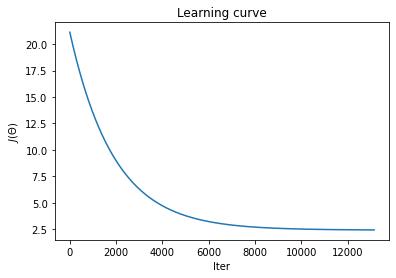

In [351]:
plt.plot(J_history[int(0.1*len(J_history)):])
plt.xlabel("Iter")
plt.ylabel("$J(\Theta)$")
plt.title("Learning curve")

## 3.5. Predict Outputs and Plot the results
Same as Step 5 in the Section 2. You can use the same function predict(X, theta)

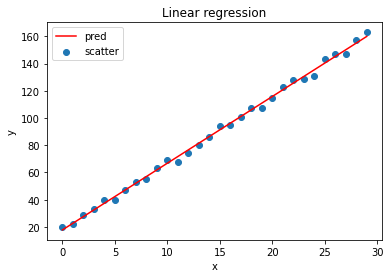

In [363]:
# plot a line for predictions and scatter plot for the training data X,y
pred = np.dot(X,theta)
X = X[:,1]
plt.scatter(X,y,label='scatter')
plt.plot(X,prediction,'r',label='pred')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression")
plt.legend()

# Section 4 : Selecting appropriate learning rate
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞. So dont worry even if you cost as inf or NaN

**Repeat the training as in Section 3 with different values of alpha as listed below. Print the alpha, cost and number of iterations it took for every alpha**

In [373]:
theta = np.zeros((2,1))
precision = 0.00001

# You can change this set of alphas and try out different, but keep your range less than 1
alphas = [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01,0.03, 0.05, 0.07, 0.1, 0.3]

# Write your code here
for alpha in alphas:
    theta, J_history, cost, count = gradientDescent(X, y, theta, alpha, precision)
    print("ALPHA:",alpha)
    print("\n")
    print("Iter:",count)
    print("J tending to", cost)
    print("\n")

ALPHA: 0.0001


Iter: 102093
J tending to 2.61303146700471


ALPHA: 0.0003


Iter: 6988
J tending to 2.4858231266367783


ALPHA: 0.0005


Iter: 1950
J tending to 2.4603781154184623


ALPHA: 0.0007


Iter: 918
J tending to 2.4494690042651595


ALPHA: 0.001


Iter: 681
J tending to 2.4412914609562164


ALPHA: 0.003


Iter: 699
J tending to 2.4285769159437693


ALPHA: 0.005


Iter: 195
J tending to 2.426035205830648


ALPHA: 0.007


Iter: 92
J tending to 2.4249435597766706


ALPHA: 0.01


Iter: 41
J tending to 2.4244215848526296


ALPHA: 0.03


Iter: 179
J tending to inf


ALPHA: 0.05


Iter: 1
J tending to inf


ALPHA: 0.07


Iter: 1
J tending to inf


ALPHA: 0.1


Iter: 1
J tending to inf


ALPHA: 0.3


Iter: 1
J tending to inf




## Section 5: Questions on Analytical and Gradient Descent approaches

1. Are the results from both the analytical and gradient descent approach are same? If not, why?
2. When do u prefer analytical approach and gradient descent approach? Hint: Explain interms of size of the dataset
3. Can we use different cost function in place of MSE? If we do, where will be changes in the gradient descent step?(Just mention using words, equations are not required)
4. How does the initialisation of the parameters $\theta$ effects the convergence? In this case we initialised $\theta$ to zeros. What happens if we choose closer to solution and farther to solution?
5. Any drawbacks of Gradient descent that you could think of? Hint : Interms of Convergence rate.
6. What if number of features increases and how does it effect the gradient descent approach and analytical approach? Note:This might require some time to look for appropriate concepts. But do note that this difference is very important to understand.
7. Comment your observations on selecting appropriate learning rate.

**Write your answers in the following Markdown**

1. They are quite similar when the hyperparams of the gradient descent is set appropriately. Gradient descent method is slighly less accurate as it is kind of an appromximation, whereas the analytical method arrives at the exact soln by solving the algaebric system of eqns.

2. When the matrices involved have high condition number, taking the inverse becomes expensive and therefore the computational cost of the analytical apporach becomes high in such a scenario. So typically, when the data set size is huge, gradient descent is preffered.

3. Yes, very much (ex. log likelihood). The will be change in calculation of the cost fn (computeCost fn), and in the update term of gradient decent which has the derivate of the cost function wrt to the params.

4. If we are close to the soln, we will require lesser number of steps to converge. But we have the danger of overshooting the optima.

5. As we approach the soln, the gradient vanishes and the process becomes increasingly slow to arrive at the optimal soln. We call this the vanishing gradient problem.

6. Increase in the number of feature increases the complexity to compute the anaytical soln as the matrix size becomes huge. But gradient descent has fewer matrix computations, therefore the increase is not as much as to the anaytical case. For high dimensional systems, stochastic gradient descent is a popular method to arrive at the apprx soln quickly rather than brute force analytical soln.

7. Higher learning rate leads to divergence. But too low of a learning rate makes the process very slow. Its good to test out the extreme cases to have an idea of what would be a reasonably low learning rate, but going too low as aforementioned makes the process very slow. So there has to be a compromise. 